
Training and evaluating: Logistic Regression
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       278
           1       0.86      0.87      0.86       622

    accuracy                           0.81       900
   macro avg       0.78      0.77      0.78       900
weighted avg       0.81      0.81      0.81       900


Training and evaluating: Decision Tree
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       278
           1       1.00      0.98      0.99       622

    accuracy                           0.99       900
   macro avg       0.98      0.99      0.98       900
weighted avg       0.99      0.99      0.99       900


Training and evaluating: Random Forest
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:03:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       278
           1       1.00      0.98      0.99       622

    accuracy                           0.98       900
   macro avg       0.97      0.99      0.98       900
weighted avg       0.98      0.98      0.98       900



<Figure size 1000x800 with 0 Axes>

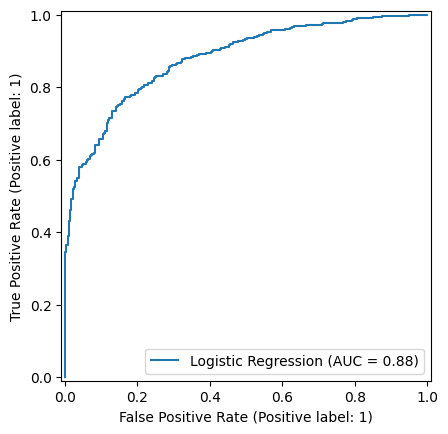

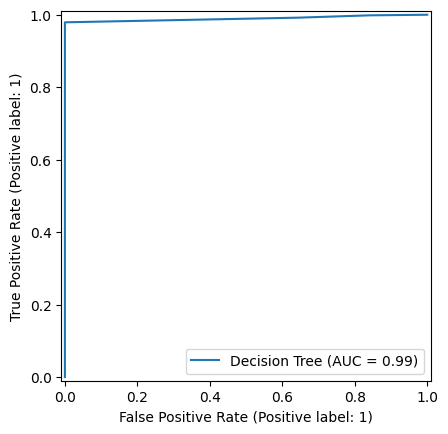

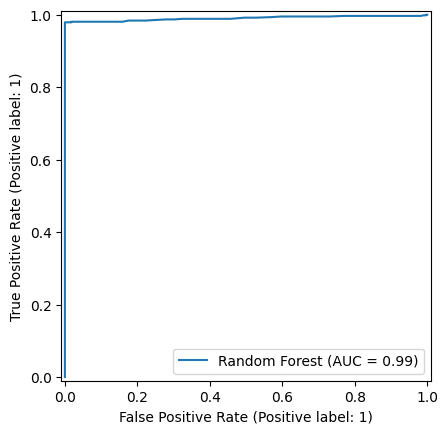

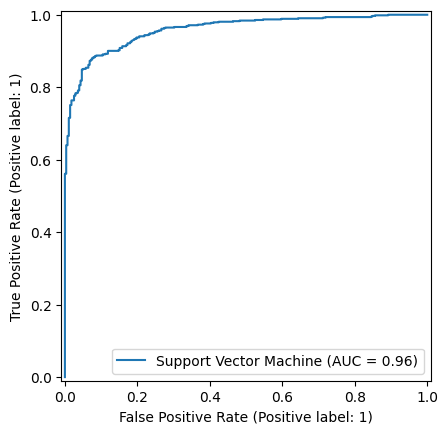

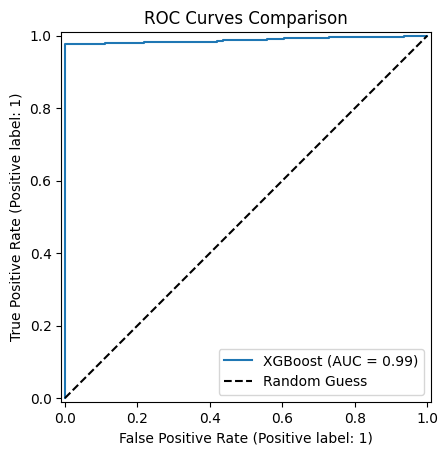

<Figure size 1000x800 with 0 Axes>

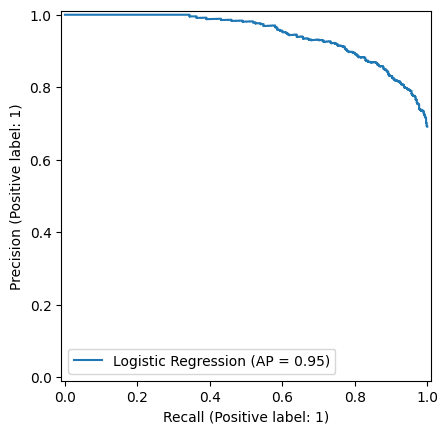

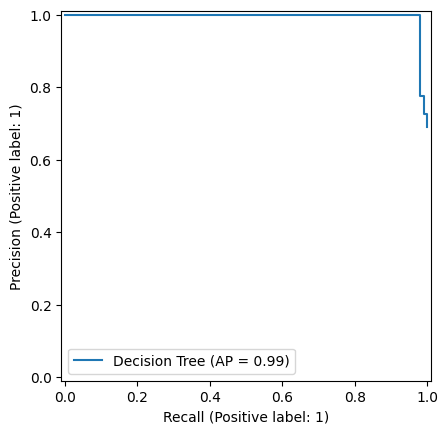

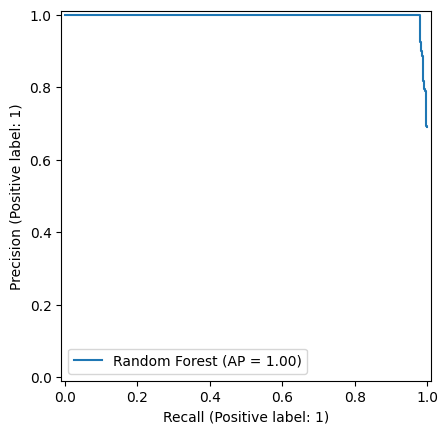

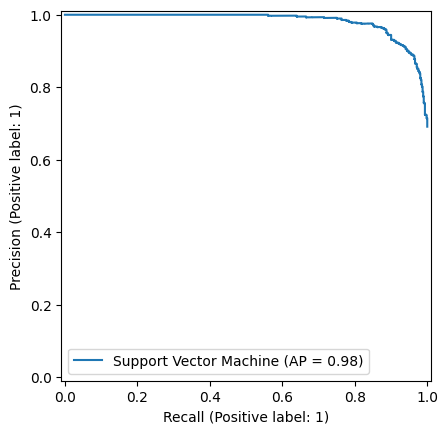

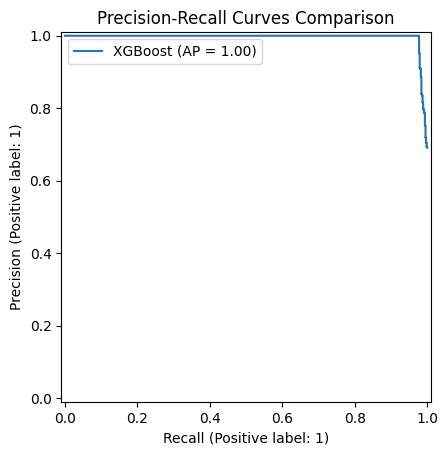

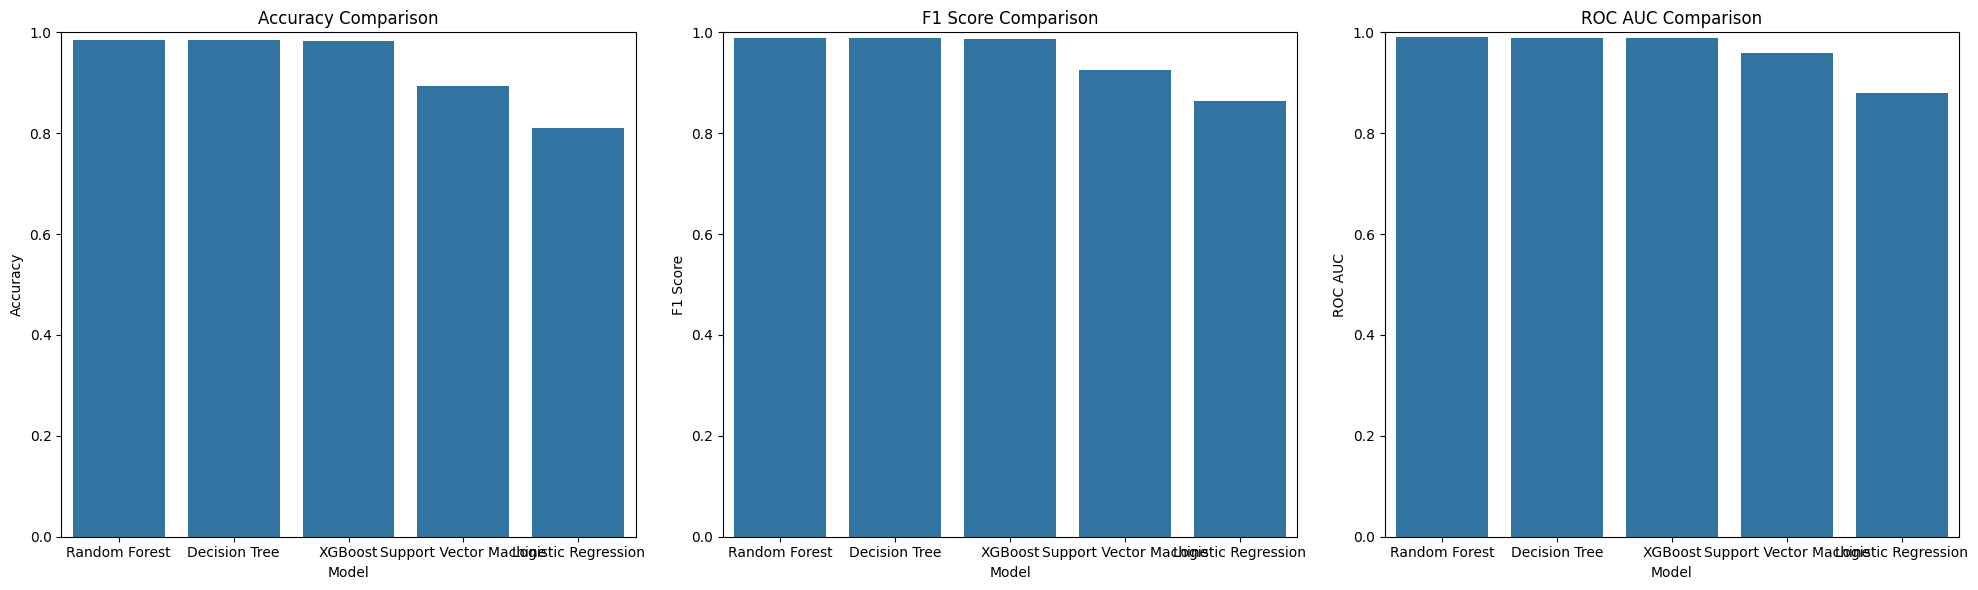

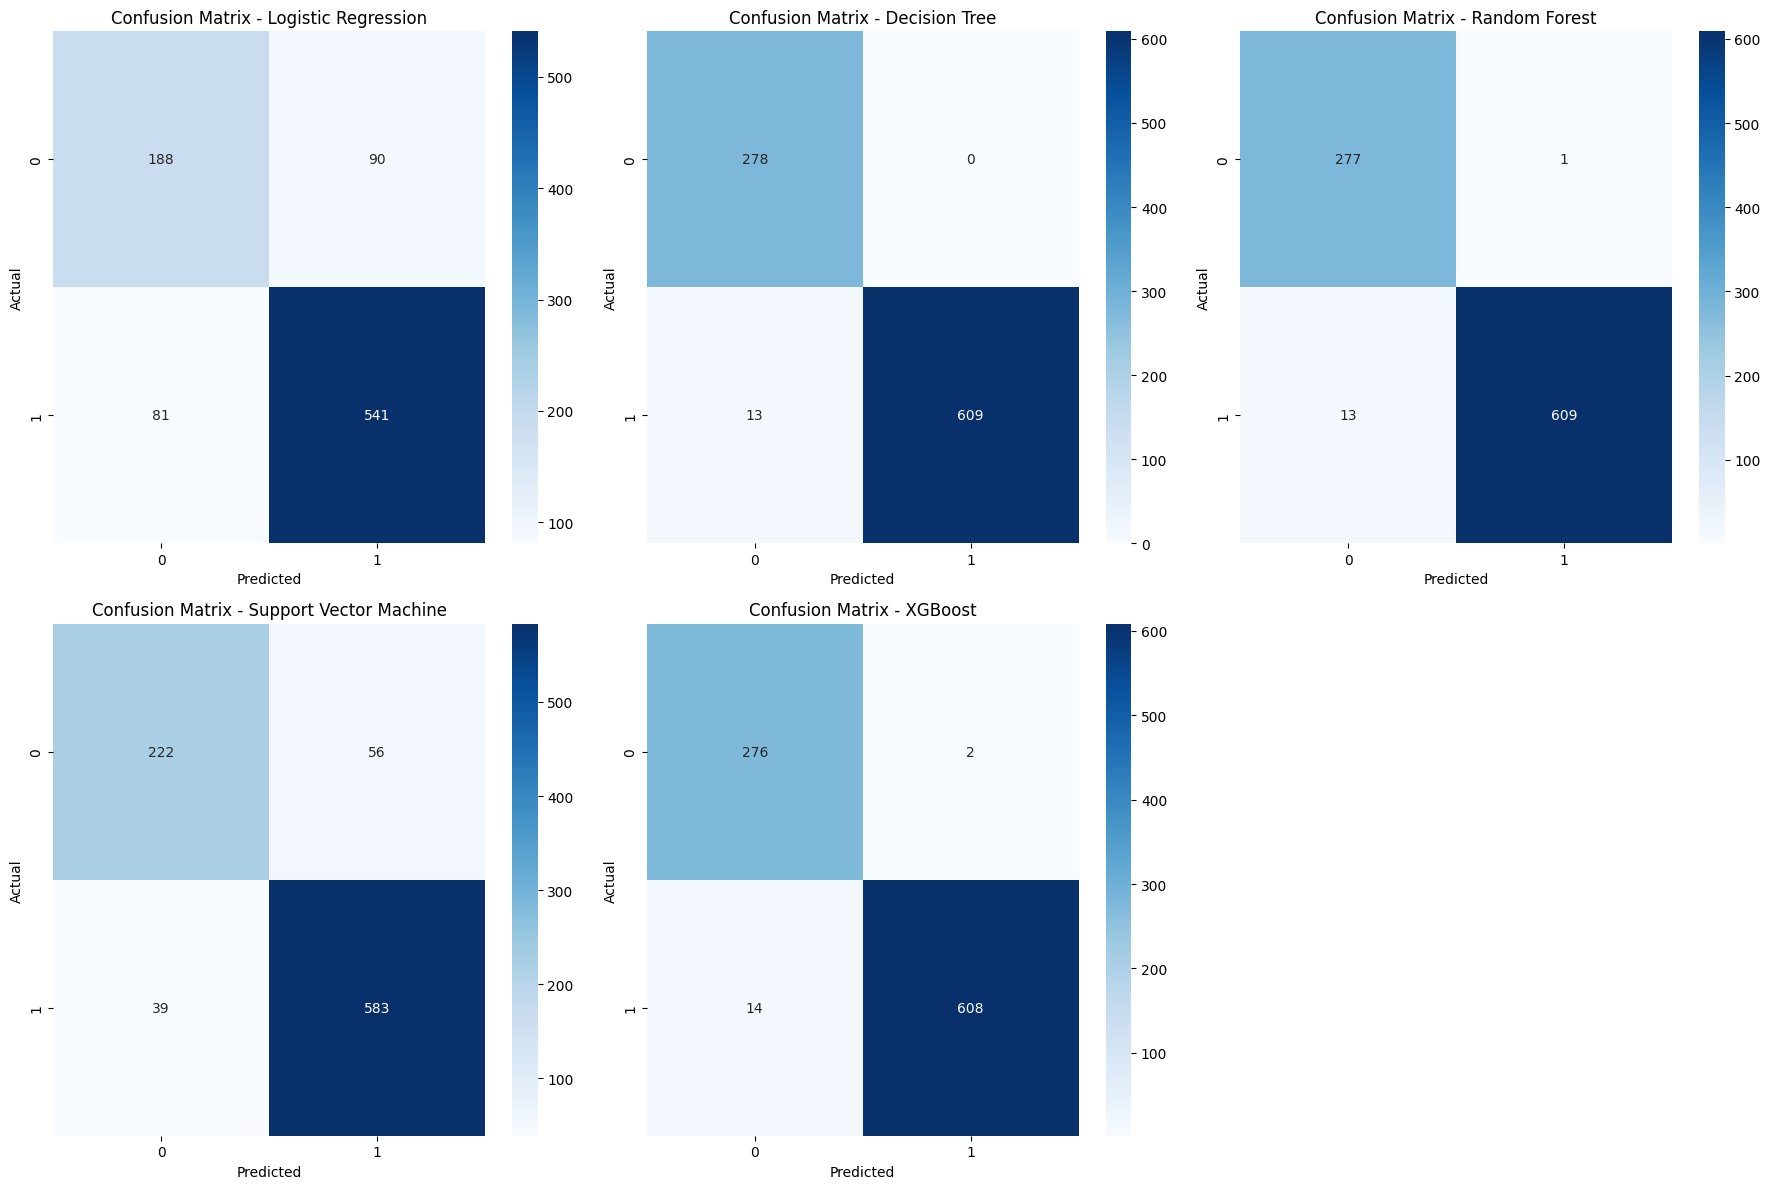


Model comparison saved to classification_model_results_advanced.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)

import xgboost as xgb

# Load preprocessed and feature-engineered data
df = pd.read_csv('yourname_feature_engineered_data.csv')

X = df.drop(columns=['Flight_Cancelled'])
y = df['Flight_Cancelled']

# Ensure features are scaled (if not done previously)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=7),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

results = []

# Cross-validation setup for robust metric estimation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')

    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "CV ROC AUC Mean": cv_scores.mean(),
        "CV ROC AUC Std": cv_scores.std(),
    })

results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)

# Visualization Section

# 1. ROC Curves (all models on one plot)
plt.figure(figsize=(10, 8))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# 2. Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name=name)
plt.title('Precision-Recall Curves Comparison')
plt.legend()
plt.show()

# 3. Bar Plots: Accuracy, F1 Score, ROC AUC
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0])
axes[0].set_title('Accuracy Comparison')
axes[0].set_ylim(0, 1)

sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[1])
axes[1].set_title('F1 Score Comparison')
axes[1].set_ylim(0, 1)

sns.barplot(x='Model', y='ROC AUC', data=results_df, ax=axes[2])
axes[2].set_title('ROC AUC Comparison')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# 4. Confusion Matrices (for each model)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

# Hide empty subplot if models < 6
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Save results summary to CSV
results_df.to_csv('classification_model_results_advanced.csv', index=False)
print("\nModel comparison saved to classification_model_results_advanced.csv")
